In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Hit rate

### Expected value

Calculation shows is $p(1-e^{-\lambda})$.

In [2]:
def simulate_hitrate(trials=10000, lam=10, p=0.2):
    for _ in range(trials):
        N = np.random.poisson(lam)
        if N == 0:
            continue
        nH = np.random.binomial(N, p)
        yield nH / N
        
def hit_rate_expected(lam, p):
    return p * (1 - np.exp(-lam))
        
np.mean(list(simulate_hitrate(100000, 5, 0.4))), hit_rate_expected(5, 0.4)

(0.40051271073213518, 0.39730482120036581)

### Variance

We have $N\sim P(\lambda)$ and $n_H \sim B(N,p)$.  Thus
$$ \mathbb{E} \Big(\frac{n_H}{N}\Big)^2
= \sum_{N\geq 1} \frac{1}{N^2} \mathbb P(N) \mathbb E(n_H^2|N)
= \sum_{N\geq 1} \frac{1}{N^2} \mathbb P(N) \big(Np + N(N-1)p^2\big)
= \sum_{N\geq 1} \mathbb P(N) \big(\frac{p}{N} + \frac{N-1}{N}p^2\big)
$$


In [3]:
def hit_rate_variance(lam, p):
    poi = scipy.stats.poisson(lam)
    x = np.arange(1, lam * 20)
    a, b = np.sum(poi.pmf(x) / x), np.sum(poi.pmf(x) / x * (x-1))
    return p * a + p * p * b - hit_rate_expected(lam, p)**2

np.var(list(simulate_hitrate(100000, 10, 0.4))), hit_rate_variance(10, 0.4)

(0.027256369380875185, 0.02713117031208323)

The variance decreases monotonically with $p_{real}$

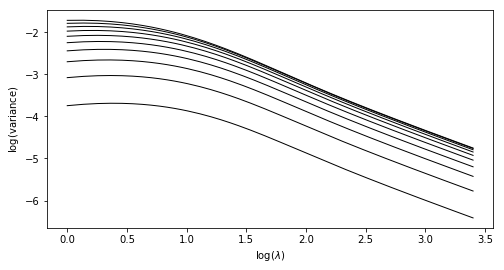

In [4]:
fig, ax = plt.subplots(figsize=(8,4))

for p in np.linspace(0.05, 0.5, 10):
    x = np.linspace(1, 30, 200)
    y = [hit_rate_variance(lam, p) for lam in x]
    ax.plot(np.log(x), np.log(y), label="$p_{real} = $"+str(p), color="black", linewidth=1)
#ax.legend()

ax.set(xlabel="$\\log(\\lambda)$", ylabel="$\\log($variance$)$")
None

In [5]:
fig.savefig("hitrate_detail1.pdf")

### Likelihood

In [6]:
def simulate_likelihood(trials, lam, pr, p):
    for _ in range(trials):
        N = np.random.poisson(lam)
        if N == 0:
            continue
        nH = np.random.binomial(N, pr)
        yield (nH * np.log(p) + (N - nH) * np.log(1 - p)) / N
        
def likelihood_expected(lam, pr, p):
    return (1-np.exp(-lam)) * (pr * np.log(p) + (1-pr) * np.log(1-p))

In [7]:
np.mean(list(simulate_likelihood(100000, 10, 0.2, 0.4))), likelihood_expected(10, 0.2, 0.4)

(-0.5921016919157932, -0.59189177232269796)

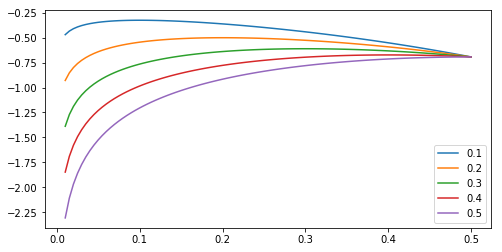

In [8]:
fig, ax = plt.subplots(figsize=(8,4))

for pr in [0.1, 0.2, 0.3, 0.4, 0.5]:
    x = np.linspace(0.01,0.5,100)
    y = [likelihood_expected(10, pr, p) for p in x]
    ax.plot(x, y, label=str(pr))
ax.legend()

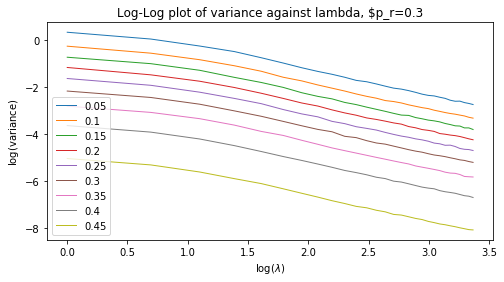

In [9]:
fig, ax = plt.subplots(figsize=(8,4))

pr = 0.3
for p in np.linspace(0.05, 0.45, 9):
    x = np.arange(1,30)
    y = [np.var(list(simulate_likelihood(10000, lam, pr, p))) for lam in x]
    ax.plot(np.log(x), np.log(y), label=str(p), linewidth=1)
ax.set(xlabel="$\log(\lambda)$", ylabel="$\log($variance$)$")
ax.set_title("Log-Log plot of variance against lambda, $p_r=0.3")
ax.legend()
None